In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [43]:
# read the data
# data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Apziva\\Project\\Potential Talents\\potential-talents - Aspiring human resources - seeking human resources.csv')
data = pd.read_csv('C:\\Users\\selene\\Desktop\\potential-talents - Aspiring human resources - seeking human resources.csv')

In [44]:
# explore data
data.head(5)

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [45]:
data.shape

(104, 5)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [47]:
# put the label of job_title as 'Aspiring Human Resources'or'seeking human resources' as 1, and the rest as 0
data_label_1 = data[data['job_title'].str.contains('Aspiring Human Resources','seeking human resources')== True]
data_label_1.loc[:,'fit'] = 1
data_label_0 = data[data['job_title'].str.contains('Aspiring Human Resources','seeking human resources')== False]
data_label_0.loc[:,'fit'] = 0


E:\anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
#combine label 1 and label 0 data，the sort index
data = pd.concat([data_label_1,data_label_0],axis=0)
data.sort_index()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,0
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,0
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,0
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,1
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,0
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,0
102,103,Always set them up for Success,Greater Los Angeles Area,500+,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          104 non-null    int64 
 1   job_title   104 non-null    object
 2   location    104 non-null    object
 3   connection  104 non-null    object
 4   fit         104 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.9+ KB


In [50]:
# check missing value
data.isnull().sum()

id            0
job_title     0
location      0
connection    0
fit           0
dtype: int64

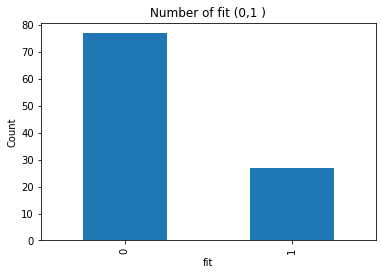

In [51]:
# check data balanced, 0 class is more than 1
plt.figure()
pd.Series(data['fit']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("fit")
plt.title('Number of fit (0,1 )');

In [52]:
# wordcloud graph
from wordcloud import WordCloud, STOPWORDS
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u','im'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color = 'white',
                          stopwords = stopwords,
                          max_words = 60,
                          max_font_size = 50)
    wordcloud.generate(str(text))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

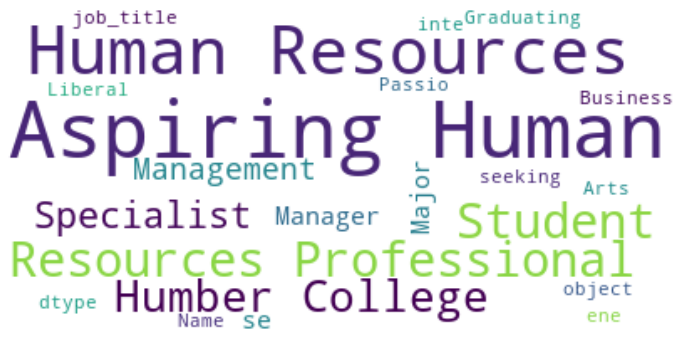

In [53]:
# label as 1
create_wordcloud(data[data['fit']==1]['job_title'])

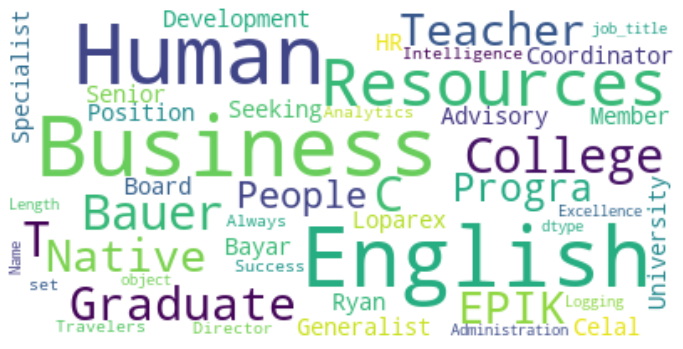

In [54]:
# label as 0
create_wordcloud(data[data['fit']==0]['job_title'])

In [55]:
# cut the connection variable as 1,2,3,4, the larger the higher rank 
data['connection'] = data['connection'].str.split('+').str[0]
data['connection'] = data['connection'].astype(int)
list = data['connection'].tolist()
list.sort()
# print(list)
data['connection'] = pd.cut(data['connection'],[0,40,200,499,600],labels=[1,2,3,4]) 
data['connection'] = data['connection'].astype('int')

In [56]:
# one hot encoding location variable
dum_key = pd.get_dummies(data['location'])
data = data.drop('location', 1)


C:\Users\selene\AppData\Local\Temp/ipykernel_80612/3855398530.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('location', 1)


In [57]:
# combine dummy data and previous data
data = pd.concat([data,dum_key],axis=1)
data.head(5)

,id,job_title,connection,fit,Amerika Birleşik Devletleri,"Atlanta, Georgia","Austin, Texas Area","Baltimore, Maryland","Baton Rouge, Louisiana Area","Bridgewater, Massachusetts",...,"Milpitas, California","Monroe, Louisiana Area","Myrtle Beach, South Carolina Area","New York, New York","Raleigh-Durham, North Carolina Area",San Francisco Bay Area,"San Jose, California","Torrance, California","Virginia Beach, Virginia","İzmir, Türkiye"
2,3,Aspiring Human Resources Professional,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,6,Aspiring Human Resources Specialist,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Student at Humber College and Aspiring Human R...,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Student at Humber College and Aspiring Human R...,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Aspiring Human Resources Professional,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['job_title'])
X = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
data = pd.concat([data,X],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Columns: 245 entries, id to world
dtypes: float64(200), int32(1), int64(2), object(1), uint8(41)
memory usage: 170.3+ KB


# Model Training

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
y = data['fit']
x = data.drop(['id','fit','job_title'], axis=1)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=26)
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state = 47)
model= LogisticRegression()
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
[cv_results.mean()-cv_results.std(),cv_results.mean()+cv_results.std()]



[0.8423329453942447, 1.010394327333028]

In [60]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LogisticRegression Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\nLogisticRegression Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\nLogisticRegression Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

LogisticRegression Classifier Accuracy: 0.688

LogisticRegression Classifier Precision: 0.444

LogisticRegression Classifier Recall: 0.444


In [156]:
# Because we need to predict 1 class probability, we drop 0 class probability
Probability = model.predict_proba(x_test)
Probability = pd.DataFrame(Probability, columns=['0','1'])
Probability = Probability.drop(['0'],axis=1)
Probability


,1
0,0.109290
1,0.580605
2,0.153730
3,0.026657
4,0.724161
5,0.015755
6,0.274536
7,0.576251
8,0.695259
9,0.230764


In [154]:
# re_ranking sort alogrithmn

def re_ranking(df,col):
    rank = df[col].tolist()
    for i in rank:
        if len(rank)>= 7:
            rank.sort(reverse=True)
            print('7th candidate is: {}'.format(rank[6]))
            rank.remove(rank[6])
            while len(rank) < 7:
                break
        else:
            break 

In [155]:
re_ranking(Probability,'1')

7th candidate is: 0.5737625390593769
7th candidate is: 0.5663549030422118
7th candidate is: 0.5433548680280338
7th candidate is: 0.474257398450583
7th candidate is: 0.4470647271530751
7th candidate is: 0.2745364273727031
7th candidate is: 0.23076367602356015
7th candidate is: 0.1842269577040095
7th candidate is: 0.17239325065628802
7th candidate is: 0.15373016242802415
7th candidate is: 0.15373016242802415
7th candidate is: 0.10928956143845789
7th candidate is: 0.08709445127682679
7th candidate is: 0.08518815290479254
7th candidate is: 0.05358119960057532
7th candidate is: 0.04182676767900423
